In [1]:
import data_loader
import data_analyze
import data_visual
import log
import warnings
import pandas as pd

In [4]:
# Игнорирование предупреждений (опционально)
warnings.filterwarnings('ignore')

In [6]:
"""
dataset from https://www.kaggle.com/datasets/paolocons/small-dataset-about-used-fiat-500-sold-in-italy
"""
file_path = "Used_fiat_500_in_Italy_dataset.csv"

In [8]:
try:
    data = data_loader.load_data_csv(file_path) 
    log.add_log_info('Чтение файла прошло успешно')
except FileNotFoundError:
    log.add_log_error('Файл не найден')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_load_data_csv')

In [10]:
data.head()

,model,engine_power,transmission,age_in_days,km,previous_owners,lat,lon,price
0,pop,69,manual,4474,56779,2,45.071079,7.46403,4490
1,lounge,69,manual,2708,160000,1,45.069679,7.70492,4500
2,lounge,69,automatic,3470,170000,2,45.514599,9.28434,4500
3,sport,69,manual,3288,132000,2,41.903221,12.49565,4700
4,sport,69,manual,3712,124490,2,45.532661,9.03892,4790


In [12]:
data.describe() # статистическая информация 

,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,73.015789,3310.265789,102196.250000,1.510526,44.257712,10.742644,5881.655263
std,9.984672,1437.555063,47115.355234,0.560244,1.767518,2.167753,2170.617946
min,69.000000,91.000000,4981.000000,1.000000,37.510872,7.320720,2890.000000
25%,69.000000,3097.250000,76611.750000,1.000000,43.514196,9.159140,4600.000000
50%,69.000000,3927.000000,112000.000000,1.000000,45.069679,10.301505,5000.000000
75%,69.000000,4322.000000,135000.000000,2.000000,45.556942,12.346788,5500.000000
max,101.000000,4719.000000,259000.000000,4.000000,46.781651,18.168011,15900.000000


In [14]:
data.info() # информация о типе данных 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            380 non-null    object 
 1   engine_power     380 non-null    int64  
 2   transmission     380 non-null    object 
 3   age_in_days      380 non-null    int64  
 4   km               380 non-null    int64  
 5   previous_owners  380 non-null    int64  
 6   lat              380 non-null    float64
 7   lon              380 non-null    float64
 8   price            380 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 26.8+ KB


In [16]:
is_null = data_analyze.check_data(data)
is_null.sum()

model              0
engine_power       0
transmission       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [18]:
# Разделение столбцов на числовые и категориальные
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [20]:
# Обработка пропущенных значений для числовых столбцов
if data[numeric_columns].isnull().sum().any():
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Обработка пропущенных значений для категориальных столбцов
if data[categorical_columns].isnull().sum().any():
    data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Кодирование категориальных признаков с использованием LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
log.add_log_info("Кодирование категориальных признаков с использованием LabelEncoder")

           Feature  Importance
3      age_in_days    0.885250
4               km    0.058394
7              lon    0.019082
6              lat    0.017143
0            model    0.007566
2     transmission    0.007065
5  previous_owners    0.004472
1     engine_power    0.001030


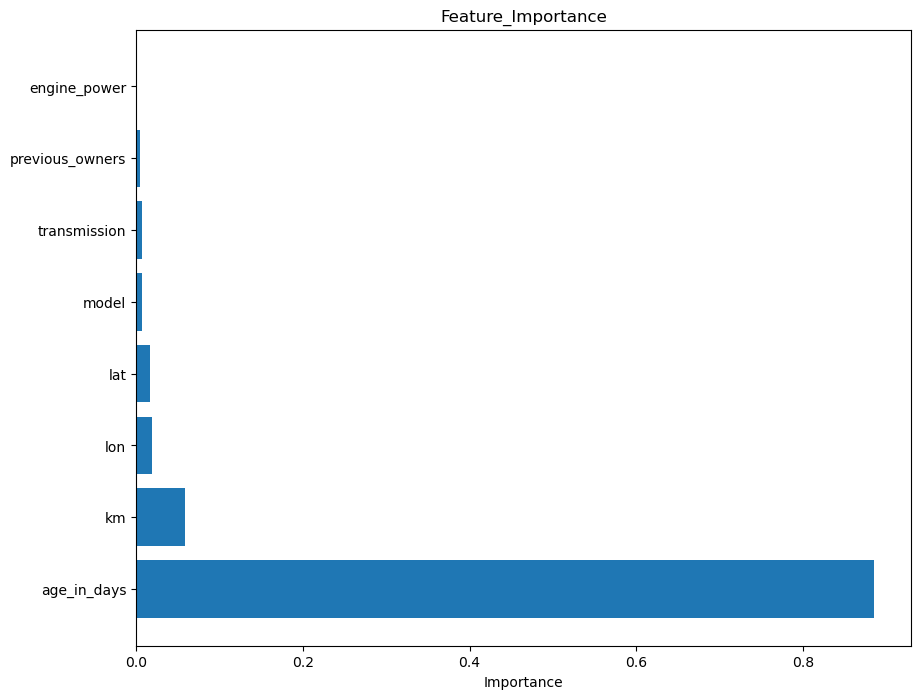

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Определение целевой переменной и признаков
# Предположим, что 'price' - это целевая переменная
X = data.drop('price', axis=1)
y = data['price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Получение важности признаков
importances = model.feature_importances_

# Создание DataFrame для визуализации
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print(feature_importances)

# Визуализация важности признаков
try:
    data_visual.add_barh(feature_importances['Feature'], feature_importances['Importance'], 'Feature_Importance')
    log.add_log_info('Визуализация важности признаков')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_barh')

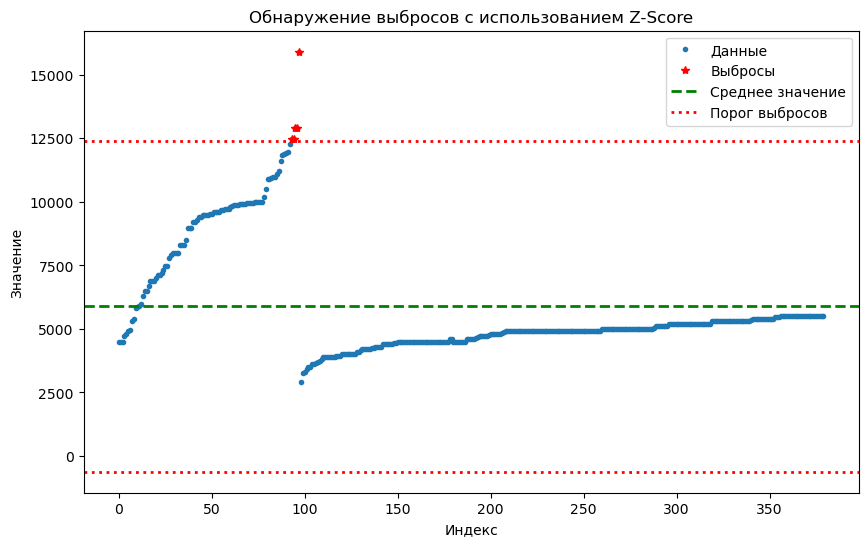

Найденные выбросы:
    model  engine_power  transmission  age_in_days     km  previous_owners  \
93      2            69             1           91  56779                1   
94      2            69             1           91  56779                2   
95      0            69             0           91  56779                2   
96      1            69             1         1217  47983                1   
97      1            69             1           91  56779                1   

          lat       lon  price  
93  44.402618  11.24928  12450  
94  44.158340  10.97556  12450  
95  41.689281  13.25494  12890  
96  45.063129   7.57680  12900  
97  45.580879  12.36937  15900  


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Вычисление Z-оценок
mean = np.mean(data.price) 
std_dev = np.std(data.price)
z_scores = [(x - mean) / std_dev for x in data.price]

# Определение порога для выбросов
threshold = 3

# Поиск выбросов
outliers = np.where(np.abs(z_scores) > threshold)

# Визуализация данных и выбросов
plt.figure(figsize=(10, 6))
plt.plot(data.price, '.', label='Данные')
plt.plot(outliers[0], data.price.iloc[outliers], 'r*', label='Выбросы')
plt.axhline(mean, color='g', linestyle='dashed', linewidth=2, label='Среднее значение')
plt.axhline(mean + threshold * std_dev, color='r', linestyle='dotted', linewidth=2, label='Порог выбросов')
plt.axhline(mean - threshold * std_dev, color='r', linestyle='dotted', linewidth=2)
plt.title('Обнаружение выбросов с использованием Z-Score')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.savefig('out_jpg/Outliers.png')
plt.show()

# Вывод найденных выбросов
print("Найденные выбросы:")
print(data.iloc[outliers])

*****************
Метрики качества GradientBoostingRegressor:
*****************
MAE: 471.4015
MSE: 392962.1037
RMSE: 626.8669
R²: 0.9230


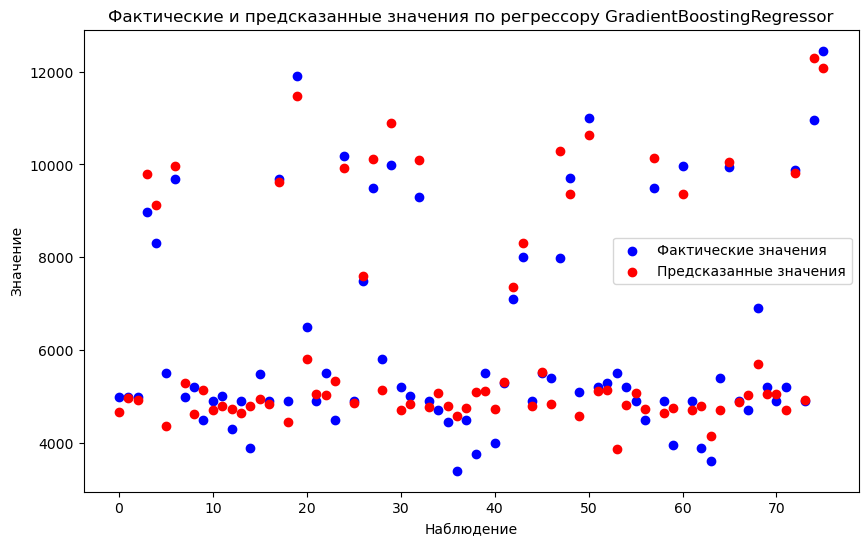

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop('price', axis=1)
y = data['price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor() # параметры
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества GradientBoostingRegressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
try:
    data_visual.add_result_predict(range(len(y_test)), y_test, y_pred, 'GradientBoostingRegressor')
    log.add_log_info('Визуализация предсказанных и фактических значений')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_result_predict')

In [27]:
!pip install lightgbm

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000238 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 304, number of used features: 7
[LightGBM] [Info] Start training from score 5797.641447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

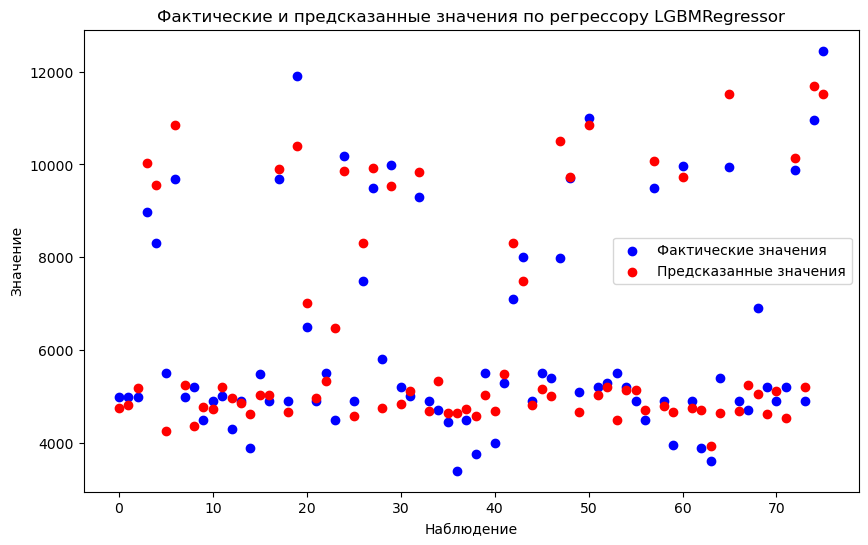

In [29]:
# Регрессор LGBM без определение параметров для подбора.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop('price', axis=1)
y = data['price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели LGBMRegressor
model = LGBMRegressor()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества LGBMRegressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
try:
    data_visual.add_result_predict(range(len(y_test)), y_test, y_pred, 'LGBMRegressor')
    log.add_log_info('Визуализация предсказанных и фактических значений')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_result_predict')

*****************
Метрики качества ExtraTreesRegressor:
*****************
MAE: 473.4728
MSE: 541456.3948
RMSE: 735.8372
R²: 0.8939


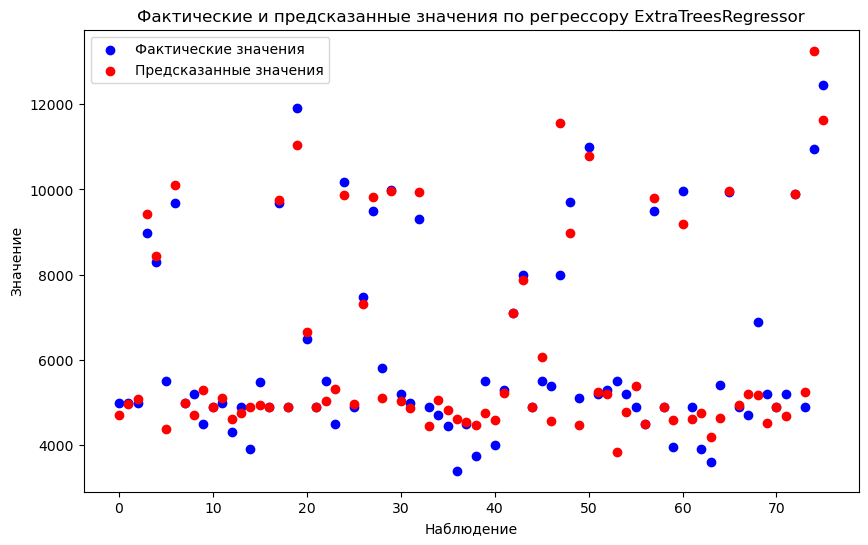

In [33]:
# ExtraTreesRegressor
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = data.drop('price', axis=1)
y = data['price']

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Создание и обучение модели Extra Trees Regressor
etr = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
etr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = etr.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества ExtraTreesRegressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
try:
    data_visual.add_result_predict(range(len(y_test)), y_test, y_pred, 'ExtraTreesRegressor')
    log.add_log_info('Визуализация предсказанных и фактических значений')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_result_predict')


In [35]:
!pip install catboost

*****************
Метрики качества CatBoostRegressor:
*****************
MAE: 555.0374
MSE: 750238.9756
RMSE: 866.1634
R²: 0.8530


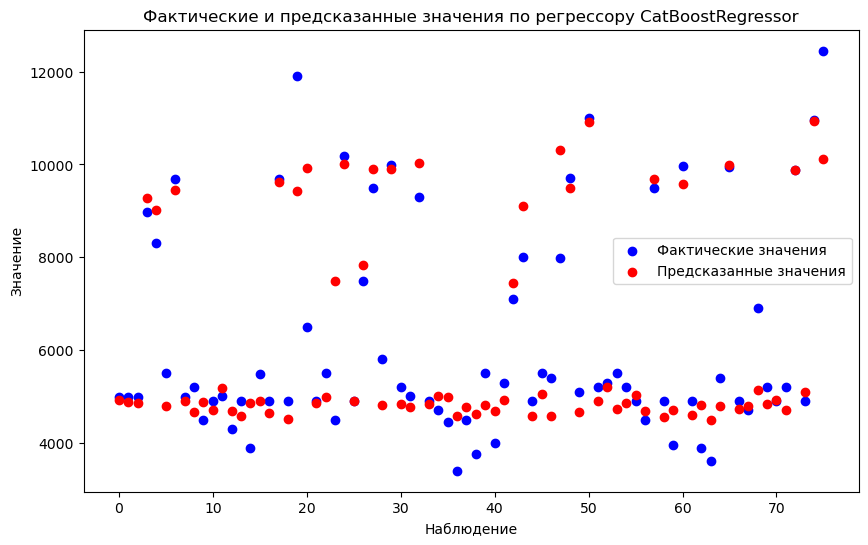

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('price', axis=1)
y = data['price']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение категориальных признаков
cat_features = ["age_in_days"]

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели CatBoost для регрессии
regressor = CatBoostRegressor(iterations=100, learning_rate=0.05, depth=6, random_state=42, verbose=0)
regressor.fit(X_train, y_train, cat_features=cat_features)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества CatBoostRegressor:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
try:
    data_visual.add_result_predict(range(len(y_test)), y_test, y_pred, 'CatBoostRegressor')
    log.add_log_info('Визуализация предсказанных и фактических значений')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_result_predict')

*****************
Метрики качества Lasso:
*****************
MAE: 559.1687
MSE: 536729.4269
RMSE: 732.6182
R²: 0.8949


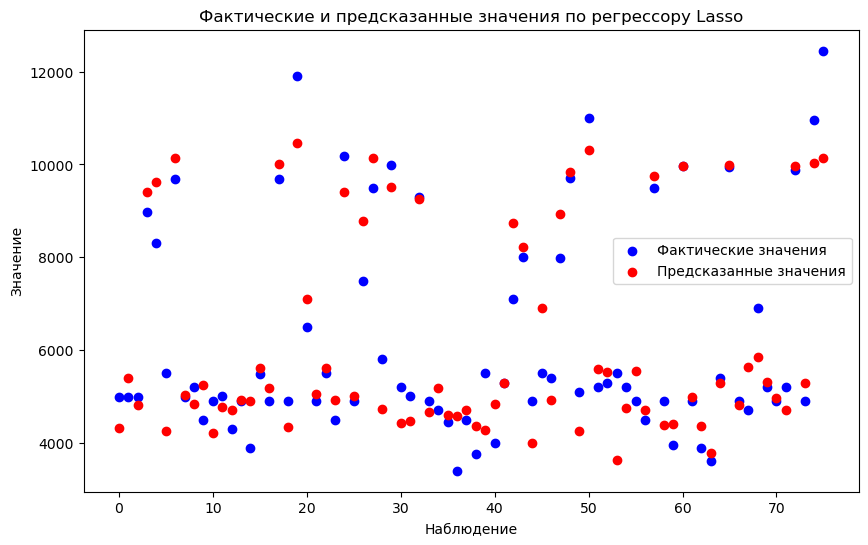

In [38]:
# Лассо
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('price', axis=1)
y = data['price']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели регрессии Lasso
regressor = Lasso(alpha=0.1)  # Здесь alpha - гиперпараметр регуляризации L1
regressor.fit(X_train, y_train)

# Выполнение предсказаний на тестовых данных
y_pred = regressor.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества Lasso:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Визуализация предсказанных и фактических значений
try:
    data_visual.add_result_predict(range(len(y_test)), y_test, y_pred, 'Lasso')
    log.add_log_info('Визуализация предсказанных и фактических значений')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_result_predict')

*****************
Метрики качества модели Ridge Regression:
*****************
MAE: 559.0471
MSE: 537209.5707
RMSE: 732.9458
R²: 0.8948

Средние метрики по кросс-валидации (5 фолдов):
MAE: 757.4043 ± 288.50
MSE: 1137951.1699 ± 891315.87
R²: -23.9166 ± 25.96
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Лучшие параметры: {'alpha': 10.0}
Лучшее значение R²: 0.8333

Метрики качества лучшей модели Ridge Regression:
MAE: 562.1150
MSE: 546104.0608
RMSE: 738.9885
R²: 0.8930


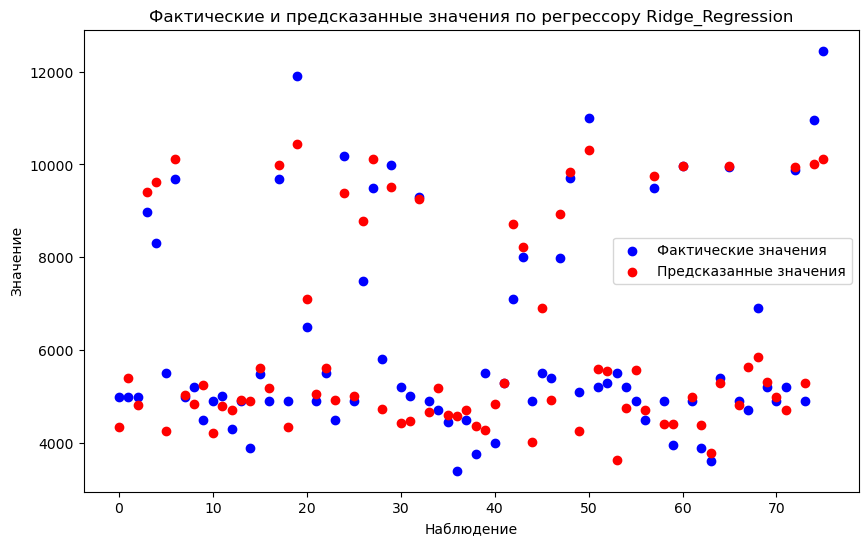

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Разделение данных на признаки и целевую переменную
df_X = data.drop(columns=['price'])
df_y = data['price']

# Убедимся, что feature_names содержит только признаки
feature_names = df_X.columns

X = df_X.values
y = df_y.values

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=RANDOM_STATE)

# Создание и обучение модели Ridge Regression
ridge_reg = Ridge(alpha=1.0, random_state=RANDOM_STATE)
ridge_reg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = ridge_reg.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели Ridge Regression:')
print(f'*****************')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# Кросс-валидация
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
cv_results = cross_validate(ridge_reg, X_scaled, y, cv=5, scoring=scoring, n_jobs=-1)

# Преобразование отрицательных метрик в положительные
mae_cv = -cv_results['test_neg_mean_absolute_error']
mse_cv = -cv_results['test_neg_mean_squared_error']
r2_cv = cv_results['test_r2']

print('')
print('Средние метрики по кросс-валидации (5 фолдов):')
print(f'MAE: {mae_cv.mean():.4f} ± {mae_cv.std():.2f}')
print(f'MSE: {mse_cv.mean():.4f} ± {mse_cv.std():.2f}')
print(f'R²: {r2_cv.mean():.4f} ± {r2_cv.std():.2f}')

# 13. Подбор гиперпараметров с помощью GridSearchCV
# Обратите внимание: параметр 'normalize' устарел в последних версиях sklearn.
# Вместо него следует предварительно стандартизировать данные, как мы сделали выше.

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 5.0, 10.0, 100.0],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search = GridSearchCV(
    estimator=Ridge(random_state=RANDOM_STATE),
    param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

print('')
print(f'Лучшие параметры: {grid_search.best_params_}')
print(f'Лучшее значение R²: {grid_search.best_score_:.4f}')

# Обучение модели с лучшими параметрами
best_ridge = grid_search.best_estimator_
best_ridge.fit(X_train, y_train)
y_pred_best = best_ridge.predict(X_test)

# Вычисление метрик для лучшей модели
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print('')
print(f'Метрики качества лучшей модели Ridge Regression:')
print(f'MAE: {mae_best:.4f}')
print(f'MSE: {mse_best:.4f}')
print(f'RMSE: {rmse_best:.4f}')
print(f'R²: {r2_best:.4f}')

# Визуализация предсказанных и фактических значений
try:
    data_visual.add_result_predict(range(len(y_test)), y_test, y_pred, 'Ridge_Regression')
    log.add_log_info('Визуализация предсказанных и фактических значений')
except Exception as e:
    log.add_log_error(f'Произошла ошибка: {e}')
finally:
    log.add_log_debug('finally_after_add_result_predict')